### Load Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Line Graph

In [85]:
gas = pd.read_csv('gas_prices.csv')

gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


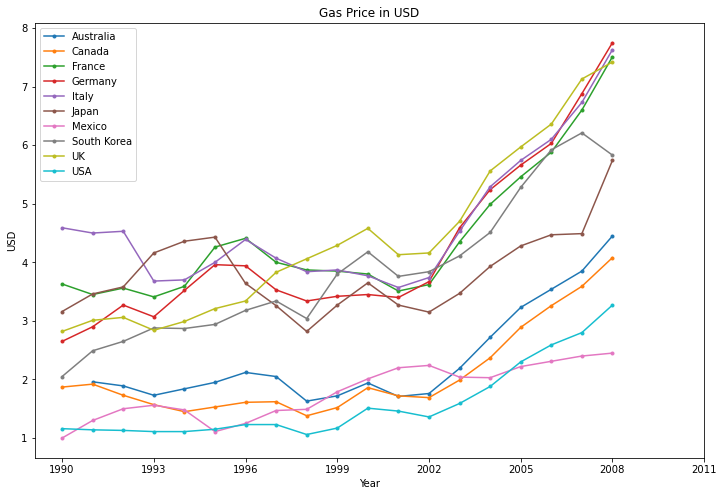

In [98]:
plt.figure(figsize=(12,8))

#plt.plot(gas.Year, gas.France)
#plt.plot(gas.Year, gas.Germany)
#plt.plot(gas.Year, gas.Italy)
#plt.plot(gas.Year, gas.Japan)
#plt.plot(gas.Year, gas.Mexico)
#plt.plot(gas.Year, gas['South Korea'])
#plt.plot(gas.Year, gas.UK, label='UK')
#plt.plot(gas.Year, gas.USA, label='USA')
#plt.plot(gas.Year, gas.Australia, label='Australia')
#plt.plot(gas.Year, gas.Canada, label='Canada')

## Alternative 1
#countries = ['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan','Mexico', 'South Korea', 'UK', 'USA']

#for country in countries:
#    plt.plot(gas.Year, gas[countries],'.-')

## Alternative 2
for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], '.-' ,label=country)


plt.title('Gas Price in USD')        

plt.xlabel('Year')
plt.ylabel('USD')

plt.xticks(gas.Year[::3].tolist() + [2011])

plt.legend(loc='upper left')

plt.savefig('gas_price_fig.png', dpi=300)

plt.show()

### Load Fifa Data

In [4]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

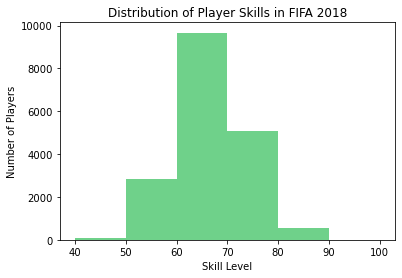

In [105]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#6fd18a')

plt.title('Distribution of Player Skills in FIFA 2018')
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')

plt.xticks(bins)

plt.show()

### Pie Chart

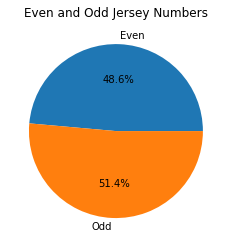

In [41]:
even = fifa.loc[fifa['Jersey Number'] % 2 == 0].count()[0]
odd = fifa.loc[fifa['Jersey Number'] % 2 != 0].count()[0]

labels = ['Even', 'Odd']

plt.pie([even, odd], labels = labels, autopct='%.1f%%')

plt.title('Even and Odd Jersey Numbers')

plt.show()

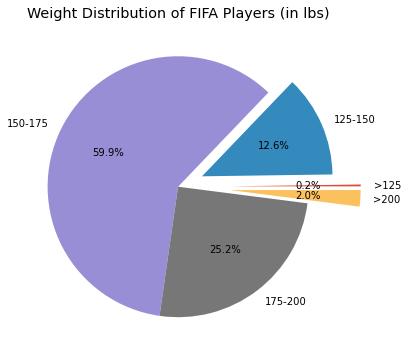

In [94]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.figure(figsize=(10,6))
plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['>125', '125-150', '150-175', '175-200', '>200']
explode = (.4, .2, 0, 0, .4)

plt.title('Weight Distribution of FIFA Players (in lbs)')
plt.pie(weights, labels=labels, autopct='%.1f%%', explode=explode)

plt.show()


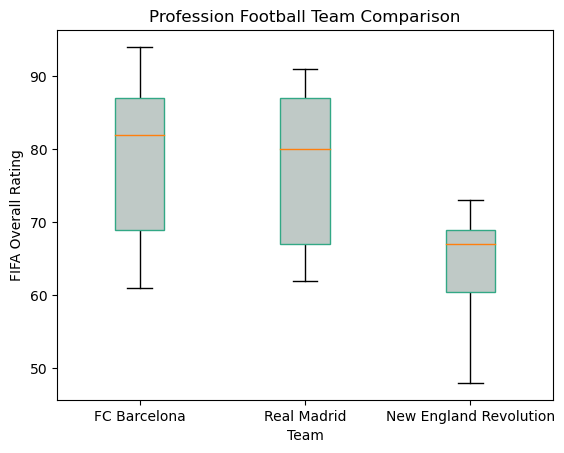

In [111]:
plt.style.use('default')

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True)

for box in boxes['boxes']:
    # Change edge color
    box.set(color='#32a885', linewidth=1)
    
    # Change fill color
    box.set(facecolor='#bfc9c6')
    

plt.title('Profession Football Team Comparison')

plt.xlabel('Team')
plt.ylabel('FIFA Overall Rating')

plt.show()